In [ ]:
from math import sqrt, pi, isnan, asin, sin, cos, atan,tan
import numpy as np
from copy import deepcopy
from numpy import finfo
import matplotlib.pyplot as plt
import math

###Root Finding Function

In [ ]:
#fzeros function:

float_epsilon = finfo(float).eps
ftol_dflt = float_epsilon*1.e4

def fzero_bisect(func,x_l,x_r,full_output=0,ftol=ftol_dflt,max_iter=1000):
    """
    Find the root of a function using the bisection method.
    
    Return the root of the (non-linear) scalar equation defined by
    ``func(x) = 0`` given two starting estimates that bracket the root.

    Parameters
    ----------
    func : callable ``f(x)``
        A function that takes at least one argument, and returns a float value.
    x_l : float
        The left-bracketing estimate for the root of ``func(x) = 0``.
    x_r : float
        The right-bracketing estimate for the root of ``func(x) = 0``.
    full_output : bool, optional
        If True, return optional outputs.
    ftol : float, optional
        The absolute tolerance on the function value at the root; i.e., if
        function value at current best guess of root is less than this, then we
        declare success.
    max_iter : int, optional
        The maximum number of bisection iterations allowed.

    Returns
    -------
    x : float
        The solution (or the result of the last iteration for
        an unsuccessful call).
    info : dict
        A dictionary of optional outputs with the keys:
        ``nIter``
            number of iterations
        ``fvec``
            function evaluated at the output
    ier : int
        An integer flag.  Set to 1 if a solution was found, otherwise refer
        to `mesg` for more information.
    mesg : str
        If no solution is found, `mesg` details the cause of failure.
    """
    func_l = func(x_l)    #Function value at left bracketing solution
    func_r = func(x_r)    #Function value at right bracketing solution
    if abs(func_l) < ftol: #Function at left bracket is already close enough
        x = x_l #Return value is left bracket value
        ier = 1 #Flag indicating successful completion
        mesg = 'Successful completion; func(x) = %.6e'%func_l
        info = {'nIter':0,'fvec':func_l}
    elif abs(func_r) < ftol: #Function at right bracket is already close enough
        x = x_r #Return value is right bracket value
        ier = 1 #Flag indicating successful completion
        mesg = 'Successful completion; func(x) = %.6e'%func_r
        info = {'nIter':0,'fvec':func_r}
    elif (func_l>ftol and func_r>ftol) or (func_l<-ftol and func_r<-ftol):
        # Brackets don't bracket zero function value! (N.B. use ftol, not 0)
        x = x_l #Junk return value
        ier = 2
        mesg = 'Starting guesses do not bracket solution: f(x_l=%.6e) = %.6e'\
            %(x_l,func_l)+', f(x_r=%.6e) = %.6e'%(x_r,func_r)
        info = {'nIter':0,'fvec':func_l}
    else:
        ier = 3 #Start out by assuming that we are going to max out iterations
        for nIter in range(max_iter):
            x = (x_l + x_r)/2.  #Mid-point of current bracket
            func_x = func(x)         #Corresponding function value
            if abs(func_x) < ftol:  #Acceptable accuracy of result; solution = x
                ier = 1 #Flag indicating successful completion
                mesg = 'Successful completion; func(x) = %.6e'%func_x
                break
            # We use triangle inequality to determine if zero value of function
            # falls in [func_x,func_r] or [func_x,func_l]; we correspondingly
            # update x_l & func_l or x_r & func_r
            if abs(abs(func_x)+abs(func_r)-abs(func_x-func_r)) < 2*ftol:
                x_l = x;    func_l = func_x
            else:
                x_r = x;    func_r = func_x
        
        #endfor nIter in range(max_iter)
        
        info = {'nIter':nIter,'fvec':func_x}
        if ier == 3:
            mesg = 'Unsuccessful completion; func(x) = %.6e'%func_x \
                +', |x_l-x_r| = %.6e'%abs(x_l-x_r)
    if full_output:
        return x, info, ier, mesg
    else:
        return x
#enddef fzero_bisect

###Isentropic Functions


Function helpss in estimating isentropic flow relations

In [ ]:
#Isentropic flow relations:

my_nan = float('NaN')
gam_dflt = 1.4          #Default ratio of specific heats

def IF_p(M,gam=gam_dflt):
    """ Given a Mach no., returns the ratio of stagnation to static pressures
        
        INPUTS:
        M   : Scalar or numpy nd-array of Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        prat : Ratio of stagnation to static pressures (same type as 'M').
               A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Given sp. heat ratio must not be less than unity
    if gam < 1.:
        return my_nan
    return np.power((1.+(gam-1.)/2.*M*M),gam/(gam-1.))


def IF_T(M,gam=gam_dflt):
    """ Given a Mach no., returns the ratio of stagnation to static temperatures
        
        INPUTS:
        M   : Scalar or numpy nd-array of Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        Trat : Ratio of stagnation to static temperatures (same type as 'M').
               A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Given sp. heat ratio must not be less than unity
    if gam < 1.:
        return my_nan
    return 1.+(gam-1.)/2.*M*M


def IF_d(M,gam=gam_dflt):
    """ Given a Mach no., returns the ratio of stagnation to static densities
        
        INPUTS:
        M   : Scalar or numpy nd-array of Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        drat : Ratio of stagnation to static densities (same type as 'M').
               A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Given sp. heat ratio must not be less than unity
    if gam < 1.:
        return my_nan
    return np.power((1.+(gam-1.)/2.*M*M),1./(gam-1.))


def IF_unp(prat,gam=gam_dflt):
    """ Given a ratio of stagnation to static pressures, returns the Mach no.
        
        INPUTS:
        prat : Scalar or numpy nd-array of ratio of stagnation to static
               pressures
        gam  : Sp. heat ratio
        
        OUTPUT:
        M : Mach numbers (same type as 'prat').
            A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Given sp. heat ratio must not be less than unity
    if gam < 1.:
        return my_nan
    return np.sqrt((np.power(prat,(gam-1.)/gam)-1.)*(2./(gam-1.)))


def IF_unT(Trat,gam=gam_dflt):
    """ Given a ratio of stagnation to static temperatures, returns the Mach no.
        
        INPUTS:
        Trat : Scalar or numpy nd-array of ratio of stagnation to static
               temperatures
        gam  : Sp. heat ratio
        
        OUTPUT:
        M : Mach numbers (same type as 'Trat').
            A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Given sp. heat ratio must not be less than unity
    if gam < 1.:
        return my_nan
    return np.sqrt((Trat-1.)*(2./(gam-1.)))


def IF_und(drat,gam=gam_dflt):
    """ Given a ratio of stagnation to static densities, returns the Mach no.
        
        INPUTS:
        drat : Scalar or numpy nd-array of ratio of stagnation to static
               densities
        gam  : Sp. heat ratio
        
        OUTPUT:
        M : Mach numbers (same type as 'rrat').
            A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Given sp. heat ratio must not be less than unity
    if gam < 1.:
        return my_nan
    return np.sqrt((np.power(drat,(gam-1.))-1.)*(2./(gam-1.)))

###Expansion Fan

In [ ]:
#Code for Expansion fan:

my_nan = float('NaN')
gam_dflt = 1.4          #Default ratio of specific heats

def EF_nu_max(gam=gam_dflt):
    """ Returns the maximum value of the Prandtl-Meyer function (obtained by
        taking limit of Mach number tending to infinity)
        
        INPUTS:
        gam : Sp. heat ratio
        
        OUTPUT:
        nu_max : Maximum Prandtl-Meyer function value
    """
    return (sqrt((gam+1)/(gam-1))-1)*90.


def EF_nu(M,gam=gam_dflt):
    """ Given a Mach no., returns the Prandtl-Meyer function value 
        
        INPUTS:
        M   : Scalar or numpy nd-array of Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        nu : Prandtl-Meyer function value for 'M' (same type as 'M') [deg].
             A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Pre-shock Mach number(s) must be supersonic
    # -> Given sp. heat ratio must not be less than unity
    if np.any(M < 1.) or gam < 1.:
        return my_nan
    MTrm = np.sqrt(M*M-1)
    gamTrm = sqrt((gam+1.)/(gam-1.))
    return (gamTrm*np.arctan(MTrm/gamTrm) - np.arctan(MTrm))*(180./pi)


def EF_M(nu,gam=gam_dflt,ftol=1.e-6,max_iter=1000):
    """ Given a value of the Prandtl-Meyer function, returns the Mach no.
        
        INPUTS:
        nu       : Scalar Prandtl-Meyer function value [deg]
        gam      : Sp. heat ratio
        ftol     : Accuracy of solution in terms of matching nu [deg]
        max_iter : Maximum no. of iterations allowed in root finding
        
        OUTPUT:
        Mach : Corresponding Mach no. (scalar)
               A 'nan' (scalar) is returned if any input error is detected,
               or if a solution is not found within the stipulated number
               of iterations up to the stipulated accuracy
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> 'nu' cannot be a numpy array; it can only be a scalar
    # -> 'nu' cannot be greater than the maximum value allowed for given 'gam'
    # -> Given sp. heat ratio must not be less than unity
    if isinstance(nu,np.ndarray) or nu > EF_nu_max(gam=gam) or gam < 1.:
        return my_nan
    # Left bracketing value of Mach number is unity
    MachLt = 1.0
    # Right bracketing value of Mach number is the last one in Anderson's table!
    MachRt = 34.0
    # Below is the anonymous function whose zero (root) will give the desired
    # wave angle corresponding to the specified turn angle
    fun = lambda M : EF_nu(M,gam=gam) - nu
    Mach, info, ier, mesg \
        = fzero_bisect(fun,MachLt,MachRt,full_output=1,ftol=ftol, \
            max_iter=max_iter)
    if ier != 1:
        print(1)
        print('nu = ',nu,', Mach = ',Mach,': ',mesg)
        return my_nan
    return Mach


def EF_mt_2(Mach,turnangle,gam=gam_dflt):
    """ Given the upstream Mach number and the turn angle of the flow, returns
        the corresponding downstream flow properties for an expansion fan.
        This function only works for scalar inputs, not numpy nd-arrays.
        
        INPUTS:
        Mach      : Upstream Mach number
        turnangle : Turn angle of flow [deg]
        gam       : Sp. heat ratio
        
        OUTPUT:
        M2   : Downstream Mach number
        p2p1 : Static pressure ratio across expansion fan
        po2p1: Post-fan stagnation to pre-fan static pressure ratio
        T2T2 : Static temperature ratio across expansion fan
           A tuple of 4 'nan's is returned if any input error is detected,
           or if a solution is not found within the stipulated number
           of iterations up to the stipulated accuracy
    """
    nu1 = EF_nu(Mach,gam=gam)
    nu2 = nu1 + turnangle
    if nu2 > EF_nu_max(gam=gam): #Flow separation instead of attached fan
        return my_nan, my_nan, my_nan, my_nan
    M2 = EF_M(nu2,gam=gam)
    if isnan(M2):   #Root-finding failed for some reason
        return my_nan, my_nan, my_nan, my_nan
    po1p1 = IF_p(Mach,gam=gam)
    p2p1 = po1p1/IF_p(M2,gam=gam)
    po2p1 = po1p1   #Since po2 = po1 across isentropic expansion fan
    T2T1 = IF_T(Mach,gam=gam)/IF_T(M2,gam=gam)
    return M2, p2p1, po2p1, T2T1


###Normal Shock

In [ ]:
#Normal shock:

my_nan = float('NaN')
gam_dflt = 1.4          #Default ratio of specific heats

def NS_M2(M1,gam=gam_dflt):
    """ Given the pre-shock Mach no., returns the post-shock Mach no.
        
        INPUTS:
        M1  : Scalar or numpy nd-array of pre-shock Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        M2 : Post-shock Mach no. (same type as 'M1').
             A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Pre-shock Mach number(s) must be supersonic
    # -> Given sp. heat ratio must not be less than unity
    if np.any(M1 < 1.) or gam < 1.:
        return my_nan
    return np.sqrt((1.+(gam-1.)/2.*M1*M1)/(gam*M1*M1-(gam-1.)/2.))


def NS_M1(M2,gam=gam_dflt):
    """ Given the post-shock Mach no., returns the pre-shock Mach no.
        
        INPUTS:
        M2  : Scalar or numpy nd-array of post-shock Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        M1 : Pre-shock Mach no. (same type as 'M2').
             A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Post-shock Mach number(s) must be subsonic
    # -> Given sp. heat ratio must not be less than unity
    if np.any(M2 > 1.) or gam < 1.:
        return my_nan
    return np.sqrt((2.+(gam-1.)*M2*M2)/(2.*gam*M2*M2-gam+1.))


def NS_p2p1(M1,gam=gam_dflt):
    """ Given the pre-shock Mach no., returns the ratio post-shock to pre-shock
        static pressures
        
        INPUTS:
        M1  : Scalar or numpy nd-array of pre-shock Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        p2p1 : Ratio of post- to pre-shock static pressures (same type as 'M1').
               A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Pre-shock Mach number(s) must be supersonic
    # -> Given sp. heat ratio must not be less than unity
    if np.any(M1 < 1.) or gam < 1.:
        return my_nan
    return 1. + 2.*gam/(gam+1.)*(M1*M1 - 1.)


def NS_po2p1(M1,gam=gam_dflt):
    """ Given the pre-shock Mach no., returns the ratio post-shock stagnation
        pressure to pre-shock static pressure
        
        INPUTS:
        M1  : Scalar or numpy nd-array of pre-shock Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        po2p1 : Ratio of post-shock stagnation pressures to pre-shock static 
                pressures (same type as 'M1').
                A 'nan' (scalar) is returned if any input error is detected.
    """
    return NS_p2p1(M1,gam=gam)*IF_p(NS_M2(M1,gam=gam),gam=gam)


def NS_M1_Pitot(p02p1,gam=gam_dflt,ftol=1.e-6,max_iter=1000):
    """ This is the supersonic Pitot probe problem:
        given the ratio of post-shock stagnation pressure to pre-shock static
        pressure, determine the pre-shock Mach number, using binary search.
        This function only works for scalar inputs, not numpy nd-arrays.
        
        INPUTS:
        po2p1    : Scalar or iterable of ratios of post-shock stagnation
                   pressures to pre-shock static pressures.
        gam      : Sp. heat ratio
        ftol     : Accuracy of solution in terms of matching pressure ratio
        max_iter : Maximum no. of iterations allowed in root finding
        
        OUTPUT:
        M1 : Pre-shock Mach numbers (same type as 'p02p1').
             A 'nan' is returned corresponding to any input that is in error, or
             if the solution is not found for the input within the stipulated
             number of iterations up to the stipulated accuracy.
    """
    # Left bracketing value of pre-shock Mach no. is 1
    M1Lt = 1.0
    # Right bracketing value of pre-shock Mach no. is ideally infinity, but
    # practically it is set to 50 (the final point in Anderson's normal shock
    # tables)
    M1Rt = 50.0
    """ Internal function that calculates for a single pressure ratio """
    def fun_scalar(p02p1_sclr):
        if p02p1_sclr < NS_po2p1(M1Lt,gam=gam) \
                or p02p1_sclr > NS_po2p1(M1Rt,gam=gam):
            return my_nan   # Unfeasible input
        # Anonymous function whose zero (root) will give the desired pre-shock
        # Mach no. corresponding to the specified pressure ratio
        fun = lambda M1 : NS_po2p1(M1,gam=gam) - p02p1_sclr
        # The actual root-finding call
        M1_sclr, _, ier, _ = fzero_bisect(fun,M1Lt,M1Rt,full_output=1, \
            ftol=ftol,max_iter=max_iter)
        if ier != 1:
            return my_nan
        return M1_sclr
    """ The following behaviour depends on whether input is iterable or not """
    try:
        iter(p02p1)             #Input is iterable
        M1 = deepcopy(p02p1)    #Make output of input's type by copying first
        for i, p02p1_sclr in enumerate(p02p1):  #Go thru each entry of input
            M1[i] = fun_scalar(p02p1_sclr)  #Overwrite corresponding output
    except TypeError:           #Input is NOT iterable (it's a scalar)
        M1 = fun_scalar(p02p1)  #Directly call scalar function
    return M1


def NS_po2po1(M1,gam=gam_dflt):
    """ Given the pre-shock Mach no., returns the ratio post-shock to pre-shock
        stagnation pressures
        
        INPUTS:
        M1  : Scalar or numpy nd-array of pre-shock Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        po2po1 : Ratio of post- to pre-shock stagnation pressures (same type as
                 'M1').
                 A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Pre-shock Mach number(s) must be supersonic
    # -> Given sp. heat ratio must not be less than unity
    if np.any(M1 < 1.) or gam < 1.:
        return my_nan
    return NS_po2p1(M1,gam=gam)/IF_p(M1,gam=gam)


def NS_T2T1(M1,gam=gam_dflt):
    """ Given the pre-shock Mach no., returns the ratio post-shock to pre-shock
        static temperatures
        
        INPUTS:
        M1  : Scalar or numpy nd-array of pre-shock Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        p2p1 : Ratio of post- to pre-shock temperatures (same type as 'M1').
               A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Pre-shock Mach number(s) must be supersonic
    # -> Given sp. heat ratio must not be less than unity
    if np.any(M1 < 1.) or gam < 1.:
        return my_nan
    return (2.*gam*M1*M1-(gam-1.))*((gam-1.)*M1*M1+2.)/((gam+1.)*M1*M1)


def NS_d2d1(M1,gam=gam_dflt):
    """ Given the pre-shock Mach no., returns the ratio post-shock to pre-shock
        static densities
        
        INPUTS:
        M1  : Scalar or numpy nd-array of pre-shock Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        d2d1 : Ratio of post- to pre-shock static densities (same type as 'M1').
               A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Pre-shock Mach number(s) must be supersonic
    # -> Given sp. heat ratio must not be less than unity
    if np.any(M1 < 1.) or gam < 1.:
        return my_nan
    return (gam+1.)*M1*M1/(2.+(gam-1.)*M1*M1)


def NS_s2s1(M1,gam=gam_dflt):
    """ Given the pre-shock Mach no., returns the increase of entropy across the
        shock normalized by the sp. heat at constant volume (Cv)
        
        INPUTS:
        M1  : Scalar or numpy nd-array of pre-shock Mach numbers
        gam : Sp. heat ratio
        
        OUTPUT:
        s2s1 : Increase of entropy across shock normalized by Cv (same type as
               'M1').
               A 'nan' (scalar) is returned if any input error is detected.
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> Pre-shock Mach number(s) must be supersonic
    # -> Given sp. heat ratio must not be less than unity
    if np.any(M1 < 1.) or gam < 1.:
        return my_nan
    return (gam-1)*np.log(1./NS_po2po1(M1,gam))


###Oblique shocks

In [ ]:
#Oblique shocks:

my_nan = float('NaN')
gam_dflt = 1.4          #Default ratio of specific heats

def OS_MachAngle(Mach):
    return asin(1./Mach)*(180./pi)


def OS_mw(Mach,waveangles,gam=gam_dflt):
    """ Given the upstream Mach number and oblique shock wave angle, returns the 
        turning angle of the flow
        
        INPUTS:
        Mach       : Upstream Mach number (scalar, not numpy array)
        waveangles : Scalar or numpy nd-array of oblique shock wave angles [deg]
        gam        : Sp. heat ratio
        
        OUTPUT:
        turnangle : Turning angle of flow (same type as 'waveangles') [deg].
                    A 'nan' (scalar) is returned if any input error is detected
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> 'Mach' cannot be a numpy array; it can only be a scalar
    # -> Upstream Mach number must be supersonic
    # -> Given waveangle(s) must be not be greater than 90 degrees
    # -> Given waveangle(s) must be not be less than the Mach angle
    # -> Given sp. heat ratio must not be less than unity
    if isinstance(Mach,np.ndarray) or Mach < 1. or np.any(waveangles > 90.) \
            or np.any(waveangles < OS_MachAngle(Mach)) or gam < 1.:
        return my_nan
    waveanglesrad = waveangles*(pi/180.)
    sinwaveanglesSqr = np.square(np.sin(waveanglesrad))
    turnangleRad = np.arctan(2.*(Mach**2*sinwaveanglesSqr-1.) \
        /(Mach**2*(gam+1.-2.*sinwaveanglesSqr)+2.)/np.tan(waveanglesrad))
    return turnangleRad*(180./pi)


def OS_wtmax(Mach,gam=gam_dflt):
    """ Given the upstream Mach number, returns the wave angle corresponding 
        to the maximum possible turning angle for an attached oblique shock wave
        
        INPUTS:
        Mach      : Upstream Mach number (scalar, not numpy array)
        gam       : Sp. heat ratio
        
        OUTPUT:
        waveanglemax : Wave angle for max turning angle of flow (scalar) [deg].
                       A 'nan' is returned if any input error is detected
    """
    # We don't allow the following; in each of these cases, a 'nan' is returned:
    # -> 'Mach' cannot be a numpy array; it can only be a scalar
    # -> Upstream Mach number must be supersonic
    # -> Given sp. heat ratio must not be less than unity
    if isinstance(Mach,np.ndarray) or Mach < 1. or gam < 1.:
        return my_nan
    waveanglemaxrad = np.arcsin(np.sqrt((1./(gam*Mach**2)) \
        *((gam+1)*Mach**2/4.-1.+np.sqrt(((gam+1)*Mach**2/4.-1.)**2 \
            + gam*(1+(gam+1)*Mach**2/2)))));
    return waveanglemaxrad*180./pi


def OS_tmax(Mach,gam=gam_dflt):
    """ Given the upstream Mach number returns the maximum possible turning
        angle for an attached oblique shock wave
        
        INPUTS:
        Mach      : Upstream Mach number (scalar, not numpy array)
        gam       : Sp. heat ratio
        
        OUTPUT:
        turnanglemax : Maximum turning angle of flow (scalar) [deg].
                       A 'nan' is returned if any input error is detected
    """
    return OS_mw(Mach,OS_wtmax(Mach,gam=gam),gam=gam)


def OS_mt(Mach,turnangle,gam=gam_dflt,ftol=1.e-6,max_iter=1000):
    """ Given the upstream Mach number and the turn angle of the flow, returns
        the corresponding weak attached oblique shock wave angle using binary
        search.
        This function only works for scalar inputs, not numpy nd-arrays.
        
        INPUTS:
        Mach      : Upstream Mach number
        turnangle : Turn angle of flow [deg]
        gam       : Sp. heat ratio
        ftol      : Accuracy of solution in terms of matching turn angle [deg]
        max_iter  : Maximum no. of iterations allowed in root finding
        
        OUTPUT:
        waveangle : Oblique shock wave angle [deg].
                    A 'nan' (scalar) is returned if any input error is detected,
                    or if a solution is not found within the stipulated number
                    of iterations up to the stipulated accuracy
    """
    if isinstance(Mach,np.ndarray) or isinstance(turnangle,np.ndarray):
        return my_nan
    # Left bracketing value of wave angle is the Mach angle
    waveangleLt = OS_MachAngle(Mach)
    # Right bracketing value of wave angle is that corresponding to the maximum
    # turning angle for attaced shock at the given Mach number
    waveangleRt = OS_wtmax(Mach,gam=gam)
    turnanglemax = OS_mw(Mach,waveangleRt,gam=gam)  #Max. turning angle allowed
    if turnangle < 0. or turnangle > turnanglemax:  #Unfeasible turning angle
        return my_nan
    # Below is the anonymous function whose zero (root) will give the desired
    # wave angle corresponding to the specified turn angle
    fun = lambda waveangle : OS_mw(Mach,waveangle,gam=gam) - turnangle
    waveangle, info, ier, mesg \
        = fzero_bisect(fun,waveangleLt,waveangleRt,full_output=1,ftol=ftol, \
            max_iter=max_iter)
    if ier != 1:
        print(2)
        print('Mach = ',Mach,', turnangle = ',turnangle,': ',mesg)
        return my_nan
    return waveangle


def OS_mt_str(Mach,turnangle,gam=gam_dflt,ftol=1.e-6,max_iter=1000):
    """ Given the upstream Mach number and the turn angle of the flow, returns
        the corresponding STRONG attached oblique shock wave angle using binary
        search.
        This function only works for scalar inputs, not numpy nd-arrays.
        
        INPUTS:
        Mach      : Upstream Mach number
        turnangle : Turn angle of flow [deg]
        gam       : Sp. heat ratio
        ftol      : Accuracy of solution in terms of matching turn angle [deg]
        max_iter  : Maximum no. of iterations allowed in root finding

        OUTPUT:
        waveangle : Oblique shock wave angle [deg].
                    A 'nan' (scalar) is returned if any input error is detected,
                    or if a solution is not found within the stipulated number
                    of iterations up to the stipulated accuracy
    """
    if isinstance(Mach,np.ndarray) or isinstance(turnangle,np.ndarray):
        return my_nan
    # Right bracketing value of wave angle is the Mach angle
    waveangleRt = 90.0
    # Left bracketing value of wave angle is that corresponding to the maximum
    # turning angle for attaced shock at the given Mach number
    waveangleLt = OS_wtmax(Mach,gam=gam)
    turnanglemax = OS_mw(Mach,waveangleLt,gam=gam)  #Max. turning angle allowed
    if turnangle < 0. or turnangle > turnanglemax:  #Unfeasible turning angle
        return my_nan
    # Below is the anonymous function whose zero (root) will give the desired
    # wave angle corresponding to the specified turn angle
    fun = lambda waveangle : OS_mw(Mach,waveangle,gam=gam) - turnangle
    waveangle, info, ier, mesg \
        = fzero_bisect(fun,waveangleLt,waveangleRt,full_output=1,ftol=ftol, \
            max_iter=max_iter)
    if ier != 1:
        print('Mach = ',Mach,', turnangle = ',turnangle,': ',mesg)
        return my_nan
    return waveangle


def OS_mt_2(Mach,turnangle,gam=gam_dflt,ftol=1.e-6,max_iter=1000):
    """ Given the upstream Mach number and the turn angle of the flow, returns
        the corresponding downstream flow properties for a weak attached oblique 
        shock wave.
        This function only works for scalar inputs, not numpy nd-arrays.
        
        INPUTS:
        Mach      : Upstream Mach number
        turnangle : Turn angle of flow [deg]
        gam       : Sp. heat ratio
        ftol      : Accuracy of solution in terms of matching turn angle [deg]
        max_iter  : Maximum no. of iterations allowed in root finding
        
        OUTPUT:
        M2   : Downstream Mach number
        p2p1 : Static pressure ratio across shock
        po2p1: Pre-shock stagnation to post-shock static pressure ratio
        T2T2 : Static temperature ratio across shock
           A tuple of 4 'nan's is returned if any input error is detected,
           or if a solution is not found within the stipulated number
           of iterations up to the stipulated accuracy

    """
    waveangle = OS_mt(Mach,turnangle,gam=gam,ftol=ftol,max_iter=max_iter)
    if isnan(waveangle):
        return my_nan, my_nan, my_nan, my_nan
    Mn1 = Mach*sin(waveangle*pi/180.)
    Mn2 = NS_M2(Mn1,gam=gam)
    M2 = Mn2/sin((waveangle-turnangle)*pi/180.)
    p2p1 = NS_p2p1(Mn1,gam=gam)
    T2T1 = NS_T2T1(Mn1,gam=gam)
    po2po1 = NS_po2po1(Mn1,gam=gam)
    po2p1 = po2po1*IF_p(Mach,gam=gam)
    return M2, p2p1, po2p1, T2T1

###Shock Expansion Theory

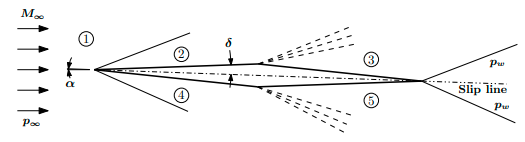

In shock-expansion theory of supersonic aerodynamics in 2D we assume the following


-The airfoil's leading edge is sharp such that there is no bow shock formed, and

-The airfoil geometry is made of straight sections


Thereafter, the problem is solved using the knoweldge of oblique shocks and expansion waves


The sectional normal force coefficient is calculated using the following formula

$$c_n = \frac{(p_4 + p_5 − p_2 − p_3) (cos δ)(c/2 cos δ)}{0.5γp_∞M^2_∞c}$$


Similarly the axial force coefficient is given as,


$$c_a = \frac{(p_a + p_c − p_b − p_d) (sin δ)(c/2 cos δ)}{0.5γp_∞M^2_∞c}$$


The coefficient of pressure $C_p$ is calculated using the formula

$$ Cp=(\frac{p}{p_\infty}-1)(0.5 \gamma M_\infty ^2)$$


The coefficient of lift and the drag is calculated using the followiing formula

$c_l = c_n cos α − c_a sin α$

$c_{d,wave} = c_n sin α + c_a cos α$



###Question 1

In [ ]:
'''
For given Free stream mach number, half-angle and angle of attack the function gives the coefficient of lift and Co-eff of drag
Inputs:
    M_inf:Upstream Mach number
    ihangle:Half angle in degrees
    aoa:Angle of attack in degrees
Outputs:
    cl:coefficient of lift
    cd:coefficient of wave drag

'''
gam_dflt=1.4
cl=0
cd=0
def shock_expansion_theory(M_inf,ihangle,aoa):
    M=np.zeros(4)
    cp=np.zeros(4)

    if(ihangle-aoa)>=0 :

        
        #Region 1
        region1=OS_mt_2(M_inf,(ihangle-aoa))
        M[0]=region1[0]
        cp[0]=(((region1[1]/region1[2])*IF_p(M_inf))-1)*(2/(gam_dflt*M_inf**2))
        
        #The if condition is to handle the prininting of the nan statements
        #Checking if the flow is subsonic after the leading edge obliques shocks
        if(M[0]<=1):
            return math.nan,math.nan
        
        #Region 2
        region2=EF_mt_2(M[0],2*ihangle) 
        M[1]=region2[0]
        cp[1]=(((region2[1]/region2[2])*IF_p(M_inf))-1)*(2/(gam_dflt*M_inf**2))
        
        #Region 3
        if ihangle+aoa >0:
            region3=OS_mt_2(M_inf,(ihangle+aoa))
        else:
            region3=EF_mt_2(M_inf,abs(ihangle+aoa))
    
        M[2]=region3[0]
        cp[2]=(region3[1]-1)*(2/(gam_dflt*M_inf**2))
        
        if(M[2]<=1):
            return math.nan,math.nan
        
        #Region 4
        region4=EF_mt_2(M[2],2*ihangle) 
        M[3]=region4[0]
        cp[3]=((region4[1]*region3[1])-1)*(2/(gam_dflt*M_inf**2))
    
        
    elif(ihangle-aoa)<0:

        #Region 1
        region1=EF_mt_2(M_inf,(aoa-ihangle)) 
        M[0]=region1[0]
        cp[0]=(((region1[1]/region1[2])*IF_p(M_inf))-1)*(2/(gam_dflt*M_inf**2))
        
        
        
        
        if(M[0]<=1):
            return math.nan,math.nan
        
        #Region 2
        region2=EF_mt_2(M[0],2*ihangle)
        M[1]=region2[0]
        cp[1]=(((region2[1]/region2[2])*IF_p(M_inf))-1)*(2/(gam_dflt*M_inf**2))
        
        #Region 3       
        if ihangle+aoa >0:
            region3=OS_mt_2(M_inf,(ihangle+aoa))
        else:
            region3=EF_mt_2(M_inf,abs(ihangle+aoa))
        
        M[2]=region3[0]
        cp[2]=(((region3[1]/region3[2])*IF_p(M_inf))-1)*(2/(gam_dflt*M_inf**2))
        
        if(M[2]<=1):
            return math.nan,math.nan
        
        #Region 4
        region4=EF_mt_2(M[2],2*ihangle) 
        M[3]=region4[0]
        cp[3]=(((region4[1]/region4[2])*IF_p(M_inf))-1)*(2/(gam_dflt*M_inf**2))
    
    #Calculating cn and ca
    cn=(region3[1]+(region4[1]*region3[1])-region1[1]-(region1[1]*region2[1]))\
    *(cos(math.radians(ihangle)))**2/(gam_dflt*M_inf**2)
    ca=(region1[1]+region3[1]-(region1[1]*region2[1])-(region4[1]*region3[1]))\
    *sin(math.radians(ihangle))*cos(math.radians(ihangle))/(gam_dflt*M_inf**2)
    

    #Calculating cl and cd
    cl=(cn*cos(math.radians(aoa)))-(ca*sin(math.radians(aoa)))
    cd=(cn*sin(math.radians(aoa)))+(ca*cos(math.radians(aoa)))
        
    return cl,cd
#End of shock_expansion_theory function

###Question 2

In [ ]:
#Inputs that are to be given while calling the shock_expansion_theory function is given below
#shock_expansion_thoery('Mach_number,'induced_half_angle','AoA')

print('Lecture Notes')
cl,cd=shock_expansion_theory(3,4,2)
print('Mach number: {}'.format(3))
print('Angle of attack (deg): {}'.format(2))
print('Half angle (delta) {}'.format(4))
print("cl: {}".format(round(cl,3)))
print("cd_wave: {}".format(round(cd,3)))

print()
print()

print('Example 10.3 of Bertin’s (2013) textbook')
cl,cd=shock_expansion_theory(2,10,10)
print('Mach number: {}'.format(2))
print('Angle of attack (deg): {}'.format(10))
print('Half angle (delta) {}'.format(10))
print("cl: {}".format(round(cl,3)))
print("cd_wave: {}".format(round(cd,3)))

print()
print()

print('Textbook of Houghton et al. (Example 7.6 of the 2013 edition)')
cl,cd=shock_expansion_theory(2,10,0)
print('Mach number: {}'.format(2))
print('Angle of attack (deg): {}'.format(0))
print('Half angle (delta) {}'.format(10))
print("cl: {}".format(round(cl,3)))
print("cd_wave: {}".format(round(cd,3)))

Lecture Notes
Mach number: 3
Angle of attack (deg): 2
Half angle (delta) 4
cl: 0.05
cd_wave: 0.009


Example 10.3 of Bertin’s (2013) textbook
Mach number: 2
Angle of attack (deg): 10
Half angle (delta) 10
cl: 0.43
cd_wave: 0.154


Textbook of Houghton et al. (Example 7.6 of the 2013 edition)
Mach number: 2
Angle of attack (deg): 0
Half angle (delta) 10
cl: -0.0
cd_wave: 0.071


Expression for effective flow parameters


$$M_e =M_{\infty}\sqrt{1 - (sin Λ  cosα)^2}$$


Where, $\Lambda$ is the sweep angle and $\alpha$ is the angle of attack


The effective angle of attack is determined as follows:

$$α_e = tan^{-1}(\frac{tan α}{cosΛ})$$

The effective thickness ratio is $\quad$ $\tau_e=\frac{\tau}{cos \Lambda}$ , for the fourth question $\tau_e=0.1$


The sectional coefficient of lift of the swept wing in terms of the effective lift coefficient as, 

$$c_l = c_{l,e} (\frac{M_e}{M_\infty})^2$$










The effective sweep is as follows, 
$\Lambda_e = sin^{-1}(sin\Lambda cos\alpha)$

The coefficient of wave drage
$c_{d,w}= c_{dw,e} cos\Lambda_e (\frac{M_e}{M_\infty})^2$

###Question 3

In [ ]:
'''
Given the upstream mach number, sweep angle and Angle of Attack the function gives the cl and cd
Inputs:
    M_inf:Free streammach number
    sweep_angle:Sweep angle in degrees
    aoa: Angle of attack in degrees
Outputs:
    cl:Coefficient of lift
    cd:Coefficient of drag
'''

def wing_sweep_cl_cdw(M_inf,sweep_angle,aoa):
    
    #converting sweep angle and angle of attack to radians
    sweep_angle_rad=math.radians(sweep_angle)
    aoa_rad=math.radians(aoa)
    
    #Estimating the effective paramerters
    M_infe=M_inf*(1-(sin(sweep_angle_rad)*cos(aoa_rad))**2)**(0.5)
    alpha_e=math.degrees(atan(tan(aoa_rad)/cos(sweep_angle_rad)))
    sweep_angle_e=math.degrees(asin(sin(sweep_angle_rad)*cos(aoa_rad)))
    
    tau_e=0.1 #effective thickness ratio
    
    ihangle=math.degrees(atan(tau_e))
    
    #calling the shock_expansion_theory function that returns the cl and cd for given conditions
    cl_e,cd_e=shock_expansion_theory(M_infe,ihangle,alpha_e)
    cl=cl_e*(M_infe/M_inf)**2
    cd=cd_e*cos(math.radians(sweep_angle_e))*(M_infe/M_inf)**2
    return cl,cd
#End of wing_sweep_cl_cdw function

###Question 4

In [ ]:
'''
Fnc wing_sweep_eff returns a list of cl and cl/cd values for a given free stream mach number and sweep. The function
calculates the cl and cl/cd for various angle of attack
Input:
    M_inf:Free stream mach number
    sweep:Sweep angle in degrees
Output:
    cl_wse: List of cl values
    cl_cd: list of cl/cd values
'''
def wing_sweep_eff(M_inf,sweep):
    aoa=np.linspace(0,20,100)
    cl_wse=[]
    cd_wse=[]
    cl_cd=[]
    for alpha in aoa:
        cl,cd=wing_sweep_cl_cdw(M_inf,sweep,alpha)
        if(np.isnan(cl)):
            #If cl value is nan further calculations are stopped and we break out of the loop
            break
        cl_wse=np.append(cl_wse,cl)
        cd_wse=np.append(cd_wse,cd+0.006)  #where 0.006 coefficient of skin friction drag
    cl_cd=cl_wse/cd_wse
    return cl_wse,cl_cd
#End of wing_sweep_eff function

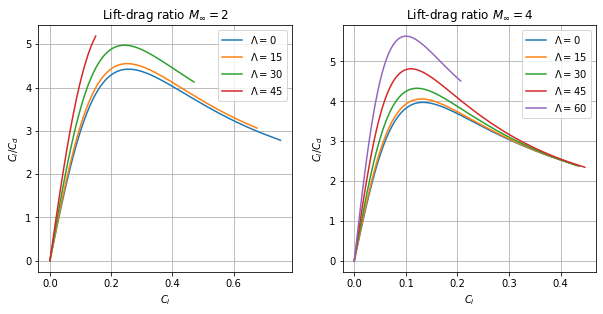

In [ ]:
#plotting the graphs

plt.figure()
plt.subplot(2,2,1)
cl_wse_0,cl_cd_0=wing_sweep_eff(2,0)
cl_wse_15,cl_cd_15=wing_sweep_eff(2,15)
cl_wse_30,cl_cd_30=wing_sweep_eff(2,30)
cl_wse_45,cl_cd_45=wing_sweep_eff(2,45)
plt.plot(cl_wse_0,cl_cd_0,label=r'$\Lambda= 0$')
plt.plot(cl_wse_15,cl_cd_15,label=r'$\Lambda= 15$')
plt.plot(cl_wse_30,cl_cd_30,label=r'$\Lambda= 30$')
plt.plot(cl_wse_45,cl_cd_45,label=r'$\Lambda= 45$')
plt.title(r"Lift-drag ratio $M_{\infty}=2$")
plt.ylabel(r'$C_l/C_d$')
plt.xlabel(r'$C_l$')
plt.legend()
plt.rcParams["figure.figsize"]=(10,10)
plt.grid()

plt.subplot(2,2,2)
cl_wse_0,cl_cd_0=wing_sweep_eff(4,0)
cl_wse_15,cl_cd_15=wing_sweep_eff(4,15)
cl_wse_30,cl_cd_30=wing_sweep_eff(4,30)
cl_wse_45,cl_cd_45=wing_sweep_eff(4,45)
cl_wse_60,cl_cd_60=wing_sweep_eff(4,60)
plt.plot(cl_wse_0,cl_cd_0,label=r'$\Lambda= 0$')
plt.plot(cl_wse_15,cl_cd_15,label=r'$\Lambda= 15$')
plt.plot(cl_wse_30,cl_cd_30,label=r'$\Lambda= 30$')
plt.plot(cl_wse_45,cl_cd_45,label=r'$\Lambda= 45$')
plt.plot(cl_wse_60,cl_cd_60,label=r'$\Lambda= 60$')
plt.title(r"Lift-drag ratio $M_{\infty}=4$")
plt.ylabel(r'$C_l/C_d$')
plt.xlabel(r'$C_l$')
plt.legend()
plt.rcParams["figure.figsize"]=(10,10)
plt.grid()


###Discussions

We have considered a symmetric double wedged airfoil having a constant effective thickness ratio $\tau_e =0.1$. Sweeping of the wing increases the Aerodynamic efficiency at higher Mach numbers.

On comparison with results from Bertin and Cummings two difference can be observed. Firstly, the aerodynaminc efficiency curves are slightly lower the reason to this may be that the increase in the wave drag coefficient due to the correction of the effective sweep angle. Secondly, the curves do not continue.

When the shock is no longer attached to the leading edge of when the flow is subsonic after leading edge obliques shock the expansion waves are not possible hence there is no solution possible using the shock-expansion theory as result of which the curves terminate.
The code blocks provided to us print the NaN statements when the above conditions are encountered, in order to prevent this from happening we are checking if the flow is subsonic after the leading-edge oblique shock and prevent the calling of the functions that print NaN statments.
